- **Project**: UAS Pembelajaran Mesin
- **Created**: Sun, 18th Dec 2022 1:15:24 PM
- **Author**: F. Waskito
- **Reference**: Randerson. (July 12, 2019). Classifiy Images Using Convolutional Neural Network & Python. Medium.com. https://randerson112358.medium.com/classify-images-using-convolutional-neural-networks-python-a89cecc8c679

Impor pustaka yang dibutuhkan

In [1]:
# Impor pustaka yang dibutuhkan
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os

plt.style.use('fivethirtyeight')

*Outset*

In [5]:
# Current working directori
os.getcwd()

'/content'

In [7]:
# Tensorflow flag (membiarkan *warning* pada non-GPU device, jika kode dijalankan pada IDE lokal)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

*Load data*

In [6]:
from keras.datasets import cifar10
# Sumber data (cifar10) telah diseparasi mejadi sampel latih dan uji
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


#### **Analisis Data**

Menampilkan tipe data dari sampel latih dan uji

In [8]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Menampilkan dimensi dari sampel latih dan uji

In [9]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


Menelusuri salah satu citra

In [10]:
index = 0
X_train[index]  # citra urutan pertama (indek ke-0) pada sampel latih

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

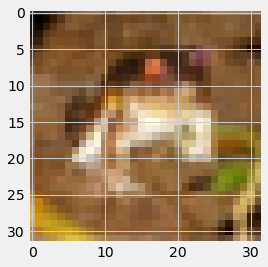

In [11]:
# Menampilkan citra secara visual
img = plt.imshow(X_train[index])

In [12]:
# Mengetahui default label (bertipe kategorik-numerik) dari citra
print('The image label is: ', y_train[index])

The image label is:  [6]


In [13]:
# Buat representasi label (kategorik-string)
label_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                'dog', 'frog', 'horse', 'ship', 'truck']

print('Number ', 'Label')
print('-------------------------')
for i in range(len(label_classes)):
    print(str(i).ljust(7), str(label_classes[i]).ljust(5))

Number  Label
-------------------------
0       airplane
1       automobile
2       bird 
3       cat  
4       deer 
5       dog  
6       frog 
7       horse
8       ship 
9       truck


In [14]:
# Tampilkan label dari citra sebelumnya
print('The image class is: ', label_classes[y_train[index][0]])

The image class is:  frog


#### **Praprosess**

***Label encoding* (dengan *one-hot encoding*)**

In [15]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [16]:
# Hasil encoding pada label sampel latih
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [17]:
# Hasil encoding pada label sampel uji
print(y_test_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [18]:
# Menampilkan hasil encoding dari salah satu citra pada sampel latih
print('The one-hot label is: ', y_train_one_hot[0])

The one-hot label is:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


**Normalisasi Citra**

In [19]:
X_train = X_train / 255     # sample latih
X_test = X_test / 255       # sampel uji

#### **Pemodelan**

**Bangun arsitektur model *Convolutional Neural Network***




In [165]:
model = Sequential()
# Convolutional and pooling layers
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
# Neural Nets and dropout layers
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(10, activation='softmax'))

**Kompilasi model**

In [166]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#### **Pelatihan Model**

In [167]:
hist = model.fit(X_train, y_train_one_hot,
                 batch_size=256, 
                 epochs=10, 
                 validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 3s 15ms/step - loss: 1.8524 - accuracy: 0.2918 - val_loss: 1.4843 - val_accuracy: 0.4525
Epoch 2/10
157/157 [==============================] - 2s 13ms/step - loss: 1.4264 - accuracy: 0.4744 - val_loss: 1.2541 - val_accuracy: 0.5458
Epoch 3/10
157/157 [==============================] - 2s 14ms/step - loss: 1.2542 - accuracy: 0.5466 - val_loss: 1.2165 - val_accuracy: 0.5578
Epoch 4/10
157/157 [==============================] - 2s 13ms/step - loss: 1.1215 - accuracy: 0.5982 - val_loss: 1.0459 - val_accuracy: 0.6289
Epoch 5/10
157/157 [==============================] - 2s 12ms/step - loss: 1.0330 - accuracy: 0.6327 - val_loss: 1.0077 - val_accuracy: 0.6445
Epoch 6/10
157/157 [==============================] - 2s 12ms/step - loss: 0.9420 - accuracy: 0.6662 - val_loss: 0.9807 - val_accuracy: 0.6548
Epoch 7/10
157/157 [==============================] - 2s 13ms/step - loss: 0.8701 - accuracy: 0.6905 - val_loss: 0.9606 - val_accuracy: 0.6653

In [168]:
# Evaluasi hasil pelatihan model
model.evaluate(X_test, y_test_one_hot)[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.8998 - accuracy: 0.6915


0.6915000081062317

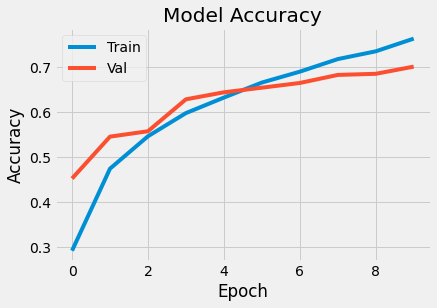

In [169]:
# Memvisualisasikan akurasi dari model
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

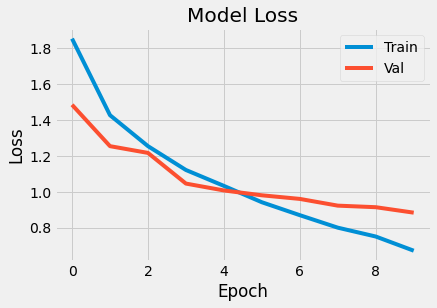

In [170]:
# Memvisualisasikan kerugian (loss) dari model
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

#### **Pengujian Model**

**Unggah citra**

In [171]:
# Asumsinya citra uji diunggah pada Google Colab
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
print('\nName of the image file: ',file_name)

# Membaca citra (3, 14, 20)
new_image = plt.imread(file_name)

Saving dog.4001.jpg to dog.4001 (1).jpg

Name of the image file:  dog.4001.jpg


**Tampilkan citra unggahan**

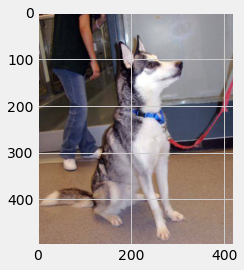

In [172]:
img = plt.imshow(new_image)

**Ubah ukuran citra**

In [173]:
# Transformasi ukuran (shape) citra dilakukan untuk 
# menyesuaikan input layer pada model
from skimage.transform import resize
resized_image = resize(new_image, (32, 32, 3))

**Buat prediksi**

In [174]:
predictions = model.predict(np.array([resized_image]))

1/1 [==============================] - 0s 76ms/step


In [175]:
# Tampilkan hasil prediksi
predictions

array([[0.02415213, 0.00049389, 0.08665659, 0.22174262, 0.05115599,
        0.45559052, 0.00124027, 0.15116528, 0.00631147, 0.00149124]],
      dtype=float32)

**Hasil Prediksi**

In [176]:
# Urutkan probabilitas hasil prediksi terhadap kelas
list_index = [0,1,2,3,4,5,6,7,8,9]

x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

print(list_index)

[5, 3, 7, 2, 4, 0, 8, 9, 6, 1]


In [177]:
# Tampilkan 5 kelas dengan probabilitas teratas dari hasil prediksi
i = 0
for i in range(5):
  print(label_classes[list_index[i]],
        ':', 
        round(predictions[0][list_index[i]] * 100, 2),
        '%')

dog : 45.56 %
cat : 22.17 %
horse : 15.12 %
bird : 8.67 %
deer : 5.12 %


***

In [178]:
model.save('185314098_cnn_model.h1')